In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
import os
import numpy as np
import h5py

https://github.com/Svanik/Diabetes-Neural-Network/blob/master/diabetes_diagnosis_nn.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
data = pd.read_csv('drive/MyDrive/Machine Learning: Final Project/Pima_dataset/diabetes.csv')

In [ ]:
X = data.drop(["Outcome"], axis=1)
y = data["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

## ANN (X)

https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/

In [ ]:
checkpoint_path = "drive/MyDrive/Machine Learning: Final Project/Code/checkpoint/cp-{epoch:01d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
import tensorflow as tf

ann = tf.keras.Sequential([

    # Adding First Hidden Layer
    # 1. units:- number of neurons that will be present in the respective layer
    # 2. activation:- specify which activation function to be used
    tf.keras.layers.Dense(units=3, kernel_initializer = 'uniform', activation="relu", kernel_regularizer=tf.keras.regularizers.L1(0.00001)),
    tf.keras.layers.Dense(units=1, kernel_initializer = 'uniform', activation="relu", kernel_regularizer=tf.keras.regularizers.L1(0.00001)),
    tf.keras.layers.Dense(units=2, kernel_initializer = 'uniform', activation="relu", kernel_regularizer=tf.keras.regularizers.L1(0.00001)),

    # Adding Output Layer
    tf.keras.layers.Dense(units=1, kernel_initializer = 'uniform', activation="sigmoid")  
])
# Compiling ANN
# ann.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])
ann.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
# Fitting ANN
history = ann.fit(X_train, 
        y_train, 
        batch_size=5,
        verbose=1,
        validation_data=(X_test, y_test),
        epochs = 1000,
        callbacks=[cp_callback])

Epoch 1/1000
 85/103 [=======================>......] - ETA: 0s - loss: 0.6899 - accuracy: 0.6494
Epoch 1: saving model to drive/MyDrive/Machine Learning: Final Project/Code/checkpoint/cp-1.ckpt
103/103 [==============================] - 1s 5ms/step - loss: 0.6894 - accuracy: 0.6459 - val_loss: 0.6850 - val_accuracy: 0.6614
Epoch 2/1000
 94/103 [==========================>...] - ETA: 0s - loss: 0.6832 - accuracy: 0.6404
Epoch 2: saving model to drive/MyDrive/Machine Learning: Final Project/Code/checkpoint/cp-2.ckpt
103/103 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.6459 - val_loss: 0.6776 - val_accuracy: 0.6614
Epoch 3/1000
 96/103 [==========================>...] - ETA: 0s - loss: 0.6759 - accuracy: 0.6500
Epoch 3: saving model to drive/MyDrive/Machine Learning: Final Project/Code/checkpoint/cp-3.ckpt
103/103 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6459 - val_loss: 0.6710 - val_accuracy: 0.6614
Epoch 4/1000
 86/103 [

In [ ]:
# Predicting - Test
ann.evaluate(X_train, y_train)
ann.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7835


[0.48851725459098816, 0.7834645509719849]

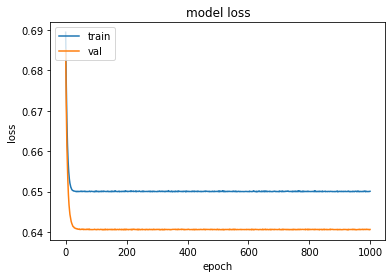

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

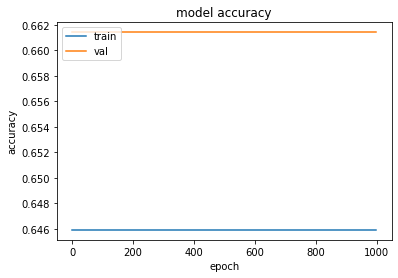

In [ ]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
sum = history.history['accuracy'] + history.history['val_accuracy']
np.argmax(sum)

1000

In [ ]:
print(np.argmax(history.history['val_accuracy']))
print(history.history['val_accuracy'][np.argmax(history.history['val_accuracy'])])

0
0.6614173054695129


In [ ]:
print(history.history['accuracy'][198])
print(history.history['val_accuracy'][198])

0.8482490181922913
0.7401574850082397


In [ ]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
311    0
429    1
182    0
586    1
679    0
Name: Outcome, Length: 254, dtype: int64

In [ ]:
pred = ann.predict(X_test)
pred[pred>0.5] = 1
pred[pred<0.5] = 0

In [ ]:
y_pred = pred

              precision    recall  f1-score   support

  No Diabete       0.82      0.88      0.85       168
     Diabete       0.73      0.62      0.67        86

    accuracy                           0.79       254
   macro avg       0.77      0.75      0.76       254
weighted avg       0.79      0.79      0.79       254



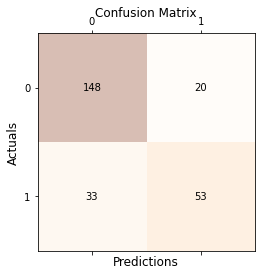

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

# probability_model = tf.keras.Sequential([ann, tf.keras.layers.Softmax()])
# y_pred = probability_model.predict(X_test)
# y_pred_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [ ]:
np.logspace(0, 4, 20)

array([1.00000000e+00, 1.62377674e+00, 2.63665090e+00, 4.28133240e+00,
       6.95192796e+00, 1.12883789e+01, 1.83298071e+01, 2.97635144e+01,
       4.83293024e+01, 7.84759970e+01, 1.27427499e+02, 2.06913808e+02,
       3.35981829e+02, 5.45559478e+02, 8.85866790e+02, 1.43844989e+03,
       2.33572147e+03, 3.79269019e+03, 6.15848211e+03, 1.00000000e+04])

In [ ]:
# Configure model
ann = tf.keras.Sequential([

    # Adding First Hidden Layer
    # 1. units:- number of neurons that will be present in the respective layer
    # 2. activation:- specify which activation function to be used
    tf.keras.layers.Dense(units=64,activation="relu"),
    # Adding Output Layer
    tf.keras.layers.Dense(units=1,activation="sigmoid")  
])
# Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
# load latest checkpoint
# checkpoint_dir = os.path.dirname(checkpoint_path)
# latest = tf.train.latest_checkpoint(checkpoint_dir)
latest = "drive/MyDrive/Machine Learning: Final Project/Code/checkpoint/cp-5.ckpt"

# Load the previously saved weights
ann.load_weights(latest)

In [ ]:
latest = "drive/MyDrive/Machine Learning: Final Project/Code/checkpoint_(3,1,2)/cp-997.ckpt"

# Load the previously saved weights
ann.load_weights(latest)

In [ ]:
#Saving created neural network
ann.save("drive/MyDrive/Machine Learning: Final Project/Code/checkpoint_(3,1,2)/ANN_e195.h5")

### Evaluation

https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

https://towardsdatascience.com/understanding-confusion-matrix-precision-recall-and-f1-score-8061c9270011